# Strategy Learner


---

This notebook provides an example of how a StrategyLearner works. This code is also available in the `__main__` function of `StrategyLearner.py`.

## Summary

We choose a stock, an in-sample period and an out-of-sample period. We train a StrategyLearner on the data from the in-sample period and test it on the out-of-sample period. Then we report the performances of the portfolio (only consisting of the stock) and benchmark for both periods. Benchmark is The performance of a portfolio starting with ``$``100,000 cash, investing in 1000 shares of JPM and holding that position.

* In this notebook, we choose the CME S&P 500 Emini futures contract (March Contracts ESH2009 and ESH2010)
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is ``$``100,000.
* Allowable positions are: 5 contracts Long, 5 contracts short, 0 shares.
* There is no limit on leverage.
* Transaction costs: Commission: $0.00, Impact: 0.0.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

[3) Out-of-sample performance](#third)

Import relevant libraries and modules

In [17]:
import datetime as dt
import pandas as pd


from util import create_df_benchmark
from StrategyLearner import StrategyLearner
from marketsim import compute_portvals_single_symbol, market_simulator
from pandas.plotting import register_matplotlib_converters



Starting cash, symbol of interest, commission, and impact



|Month     | contract| date range              |
|----------|---------|-------------------------|
|March     | ESH2009 | 2009-03-19 to 2007-12-21|
|June      | ESM2009 | 2009-06-18 to 2008-03-20|
|September | ESU2009 | 2009-09-17 to 2008-06-20|
|December  | ESZ2009 | 2009-12-17 to 2008-09-19|





In [18]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [19]:
start_date = dt.datetime(2014, 10, 6)
end_date = dt.datetime(2018, 4, 3)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position

In [20]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                              num_shares)
print (df_benchmark_trades)

            Shares
Date              
2014-10-06       5
2018-04-03      -5


Create an instance of StrategyLearner and retrieve a trades dataframe via test_policy

s = 1897 a = 1
s = 1798 a = 0
s = 1798 a = 0 r = 0.0
s = 797 a = 0
s = 797 a = 0 r = -0.04706950207468874
s = 799 a = 2
s = 799 a = 2 r = -0.033770867847584984
s = 1799 a = 0
s = 1799 a = 0 r = 0.0
s = 799 a = 2
s = 799 a = 2 r = -0.07377590075227669
s = 1699 a = 0
s = 1699 a = 0 r = 0.0
s = 699 a = 1
s = 699 a = 1 r = -0.08601146819575933
s = 699 a = 0
s = 699 a = 0 r = -0.10139434141058623
s = 689 a = 2
s = 689 a = 2 r = -0.10132396649554165
s = 1689 a = 0
s = 1689 a = 0 r = 0.0
s = 689 a = 0
s = 689 a = 0 r = -0.0781578947368422
s = 689 a = 1
s = 689 a = 1 r = -0.056372549019607865
s = 689 a = 2
s = 689 a = 2 r = -0.06597402597402602
s = 1789 a = 0
s = 1789 a = 0 r = 0.0
s = 889 a = 0
s = 889 a = 0 r = -0.05498150274269675
s = 889 a = 1
s = 889 a = 1 r = -0.05646397547266213
s = 889 a = 2
s = 889 a = 2 r = -0.04659090909090913
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 0
s = 1446 a = 0 r = 0.0
s = 667 a = 0
s = 667 a = 0 r = -0.027094208302262057
s = 768 a = 1
s = 768 a = 1 

s = 2 a = 1 r = -0.024562808703777916
s = 100 a = 0
s = 100 a = 0 r = 0.009674922600619196
s = 0 a = 0
s = 0 a = 0 r = 0.05894181224079431
s = 0 a = 0
s = 0 a = 0 r = 0.0579218494785777
s = 112 a = 0
s = 112 a = 0 r = 0.030722356226989933
s = 211 a = 0
s = 211 a = 0 r = -0.0003914405010438937
s = 343 a = 0
s = 343 a = 0 r = 0.0020544427324088455
s = 687 a = 0
s = 687 a = 0 r = -0.01477389516957861
s = 573 a = 0
s = 573 a = 0 r = -0.024326785481982638
s = 787 a = 0
s = 787 a = 0 r = -0.010937301284497103
s = 897 a = 1
s = 897 a = 1 r = -0.03281430961266252
s = 897 a = 2
s = 897 a = 2 r = -0.029751218261092616
s = 1797 a = 0
s = 1797 a = 0 r = 0.0
s = 585 a = 0
s = 585 a = 0 r = -0.020470829068577334
s = 573 a = 1
s = 573 a = 1 r = -0.007106598984771617
s = 896 a = 0
s = 896 a = 0 r = -0.015593561368209219
s = 798 a = 0
s = 798 a = 0 r = -0.02440257933999246
s = 798 a = 1
s = 798 a = 1 r = -0.03947705716482952
s = 699 a = 2
s = 699 a = 2 r = -0.029291900152827344
s = 1588 a = 0
s = 1588 

s = 998 a = 2 r = -0.02361359570661903
s = 1898 a = 0
s = 1898 a = 0 r = 0.0
s = 899 a = 2
s = 899 a = 2 r = -0.044167473378509126
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1698 a = 0
s = 1698 a = 0 r = 0.0
s = 798 a = 2
s = 798 a = 2 r = -0.04495600819573342
s = 1588 a = 1
s = 1588 a = 1 r = 0.0
s = 1697 a = 0
s = 1697 a = 0 r = 0.0
s = 589 a = 0
s = 589 a = 0 r = -0.026831295262970345
s = 589 a = 1
s = 589 a = 1 r = -0.0717116670795146
s = 579 a = 0
s = 579 a = 0 r = -0.0884130982367759
s = 579 a = 1
s = 579 a = 1 r = -0.06716785802316982
s = 568 a = 0
s = 568 a = 0 r = -0.04911092294665531
s = 458 a = 1
s = 458 a = 1 r = -0.03552206673842839
s = 338 a = 0
s = 338 a = 0 r = -0.026952892069171064
s = 337 a = 2
s = 337 a = 2 r = -0.0356499819949585
s = 1338 a = 0
s = 1338 a = 0 r = 0.0
s = 957 a = 0
s = 957 a = 0 r = -0.04051147227533458
s = 956 a = 0
s = 956 a = 0 r = -0.025937278943645392
s = 955 a = 0
s = 955 a = 0 r = -0.022180495247036802
s = 

s = 1975 a = 0 r = 0.0
s = 764 a = 2
s = 764 a = 2 r = -0.009970301230377565
s = 1875 a = 0
s = 1875 a = 0 r = 0.0
s = 765 a = 2
s = 765 a = 2 r = -0.011232383172618432
s = 1665 a = 0
s = 1665 a = 0 r = 0.0
s = 666 a = 2
s = 666 a = 2 r = -0.012306386590282159
s = 1876 a = 0
s = 1876 a = 0 r = 0.0
s = 766 a = 1
s = 766 a = 1 r = -0.017525225703664438
s = 666 a = 2
s = 666 a = 2 r = -0.017430120097778667
s = 1666 a = 0
s = 1666 a = 0 r = 0.0
s = 556 a = 1
s = 556 a = 1 r = -0.01701403658017875
s = 447 a = 2
s = 447 a = 2 r = -0.020506247997436722
s = 1557 a = 0
s = 1557 a = 0 r = 0.0
s = 557 a = 1
s = 557 a = 1 r = -0.022174840085287917
s = 14 a = 0
s = 14 a = 0 r = -0.008664028238314359
s = 114 a = 2
s = 114 a = 2 r = -0.012747723620782025
s = 1235 a = 0
s = 1235 a = 0 r = 0.0
s = 444 a = 2
s = 444 a = 2 r = -0.01927582534611294
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1965 a = 0
s = 1965 a = 0 r = 0.0
s = 865 a = 0
s = 865 a = 0 r = -0.0116303436

s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1479 a = 0
s = 1479 a = 0 r = 0.0
s = 469 a = 0
s = 469 a = 0 r = -0.05596038863976083
s = 458 a = 2
s = 458 a = 2 r = -0.0480876346082435
s = 1105 a = 0
s = 1105 a = 0 r = 0.0
s = 0 a = 0
s = 0 a = 0 r = 0.04258834327673244
s = 1 a = 0
s = 1 a = 0 r = 0.017593436645396587
s = 0 a = 0
s = 0 a = 0 r = 0.028579229999089795
s = 0 a = 0
s = 0 a = 0 r = 0.057680079934599005
s = 0 a = 0
s = 0 a = 0 r = 0.047809489183784804
s = 100 a = 0
s = 100 a = 0 r = 0.04125293374255279
s = 100 a = 0
s = 100 a = 0 r = 0.045540116539668274
s = 200 a = 0
s = 200 a = 0 r = 0.030727762803234526
s = 321 a = 0
s = 321 a = 0 r = 0.024877396344181846
s = 321 a = 0
s = 321 a = 0 r = 0.021904336164506044
s = 210 a = 0
s = 210 a = 0 r = 0.034507292778370724
s = 210 a = 0
s = 210 a = 0 r = 0.04814390265408697
s = 220 a = 0
s = 220 a = 0 r = 0.045078358865997536
s = 350 a = 0
s = 350 a = 0 r = 0.03247

s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008444338725023814
s = 221 a = 0
s = 221 a = 0 r = 0.011286681715575675
s = 331 a = 0
s = 331 a = 0 r = 0.012990080302314633
s = 542 a = 0
s = 542 a = 0 r = 0.00920353982300881
s = 432 a = 1
s = 432 a = 1 r = 0.013195098963242224
s = 121 a = 0
s = 121 a = 0 r = 0.01974462047765424
s = 0 a = 0
s = 0 a = 0 r = 0.039136622390891884
s = 0 a = 0
s = 0 a = 0 r = 0.060519418632356436
s = 0 a = 0
s = 0 a = 0 r = 0.09927797833935015
s = 0 a = 0
s = 0 a = 0 r = 0.092879631872124
s = 0 a = 0
s = 0 a = 0 r = 0.071505569529285
s = 200 a = 0
s = 200 a = 0 r = 0.053414227932429226
s = 200 a = 0
s = 200 a = 0 r = 0.054188948306595375
s = 100 a = 0
s = 100 a = 0 r = 0.06159161305694538
s = 100 a = 0
s = 100 a = 0 r = 0.08369201339072219
s = 100 a = 0
s = 100 a = 0 r = 0.06529044647143545
s = 100 a = 0
s = 100 a = 0 r = 0.07056716417910447
s = 100 a = 0
s = 100 a = 0 r = 0.07585958163019957
s = 210 a = 0
s = 210 a = 0 r = 0.0519652

s = 1334 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a = 0
s = 1001 a = 0 r = -0.0
s = 122 a = 0
s = 122 a = 0 r = 0.010656583018219368
s = 1 a = 0
s = 1 a = 0 r = 0.026602453847035856
s = 1 a = 0
s = 1 a = 0 r = 0.03327996340347672
s = 111 a = 0
s = 111 a = 0 r = 0.017801768691857123
s = 111 a = 0
s = 111 a = 0 r = 0.02167679779791265
s = 111 a = 0
s = 111 a = 0 r = 0.02312800549576366
s = 111 a = 0
s = 111 a = 0 r = 0.023261143577403498
s = 331 a = 0
s = 331 a = 0 r = 0.011574604629841834
s = 443 a = 0
s = 443 a = 0 r = 0.007779430271136034
s = 332 a = 0
s = 332 a = 0 r = 0.007816091954022997
s = 221 a = 0
s = 221 a = 0 r = 0.01552795031055898
s = 332 a = 0
s = 332 a = 0 r = 0.007263085081853804
s = 442 a = 0
s = 442 a = 0 r = 0.0073419754502696
s = 332 a = 0
s = 332 a = 0 r = 0.0

s = 1977 a = 1
s = 1977 a = 1 r = 0.0
s = 1977 a = 1
s = 1977 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1978 a = 1
s = 1978 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1876 a = 1
s = 1876 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1657 a = 1
s = 1657 a = 1 r = 0.0
s = 1657 a = 1
s = 1657 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1546 a = 1
s = 1546 a = 1 r = 0.0
s = 1967 a = 1
s = 1967 a = 1 r = 0.0
s = 1646 a = 1
s = 1646 a = 1 r = 0.0
s = 1755 a = 1
s = 1755 a = 1 r = 0.0
s = 1755 a = 1
s = 1755 a = 1 r = 0.0
s = 1854 a = 1
s = 1854 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1966 a = 1
s = 1966 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1955 a =

s = 1552 a = 0 r = 0.0
s = 553 a = 2
s = 553 a = 2 r = 0.003929974991068286
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1656 a = 1
s = 1656 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 123 a = 2
s = 123 a = 2 r = -0.0039739884393064084
s = 1654 a = 0
s = 1654 a = 0 r = 0.0
s = 334 a = 2
s = 334 a = 2 r = -0.0010737294201861314
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1864 a = 1
s = 1864 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s = 1966 a = 1
s = 1966 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1664 a = 0
s = 1664 a = 0 r = 0.0
s = 333 a = 2
s 

s = 1876 a = 1
s = 1876 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = -0.0
s = 1112 a = 0
s = 1112 a = 0 r = 0.0
s = 114 a = 2
s = 114 a = 2 r = 0.007887392306758834
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1122 a = 0
s = 1122 a = 0 r = 0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008309248554913329
s = 11 a = 0
s = 11 a = 0 r = 0.015892126173850274
s = 222 a = 0
s = 222 a = 0 r = 0.005903614457831274
s = 111 a = 0
s = 111 a = 0 r = 0.020726009344674723
s = 111 a = 0
s = 111 a = 0 r = 0.02495522388059701


s = 1012 a = 0
s = 1012 a = 0 r = -0.0
s = 12 a = 1
s = 12 a = 1 r = 0.007415254237288171
s = 12 a = 1
s = 12 a = 1 r = 0.008894536213468918
s = 12 a = 1
s = 12 a = 1 r = 0.007618241455930597
s = 12 a = 1
s = 12 a = 1 r = 0.011205073995771642
s = 122 a = 0
s = 122 a = 0 r = 0.00707273303071887
s = 221 a = 0
s = 221 a = 0 r = 0.002433604909533371
s = 332 a = 0
s = 332 a = 0 r = 0.012116147900564034
s = 332 a = 0
s = 332 a = 0 r = 0.009550797649034437
s = 222 a = 0
s = 222 a = 0 r = 0.01060367454068245
s = 232 a = 0
s = 232 a = 0 r = 0.00799831614396973
s = 122 a = 0
s = 122 a = 0 r = 0.008451299387280842
s = 222 a = 0
s = 222 a = 0 r = 0.004335871404399283
s = 222 a = 0
s = 222 a = 0 r = 0.005916534601162149
s = 232 a = 0
s = 232 a = 0 r = 0.00811636976915775
s = 222 a = 0
s = 222 a = 0 r = 0.010105263157894728
s = 121 a = 0
s = 121 a = 0 r = 0.009415996614473121
s = 11 a = 0
s = 11 a = 0 r = 0.02226423020373869
s = 222 a = 0
s = 222 a = 0 r = 0.01429171920975203
s = 121 a = 0
s = 121 a

s = 0 a = 0 r = 0.06321055025011368
s = 100 a = 0
s = 100 a = 0 r = 0.0286218752904005
3 -0.001387499999999986
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0


s = 100 a = 0 r = 0.06529044647143545
s = 100 a = 0
s = 100 a = 0 r = 0.07056716417910447
s = 100 a = 0
s = 100 a = 0 r = 0.07585958163019957
s = 210 a = 0
s = 210 a = 0 r = 0.051965276103207114
s = 200 a = 0
s = 200 a = 0 r = 0.07477080604833908
s = 200 a = 0
s = 200 a = 0 r = 0.06262771967784586
s = 210 a = 0
s = 210 a = 0 r = 0.059493822718004075
s = 210 a = 0
s = 210 a = 0 r = 0.06080269166065855
s = 340 a = 0
s = 340 a = 0 r = 0.057190715482172805
s = 470 a = 0
s = 470 a = 0 r = 0.05299511730379902
s = 470 a = 0
s = 470 a = 0 r = 0.0557545367717287
s = 330 a = 0
s = 330 a = 0 r = 0.05897961645157401
s = 452 a = 0
s = 452 a = 0 r = 0.030856578622562303
s = 218 a = 2
s = 218 a = 2 r = 0.02003550595992898
s = 1117 a = 1
s = 1117 a = 1 r = 0.0
s = 1002 a = 0
s = 1002 a = 0 r = 0.0
s = 100 a = 0
s = 100 a = 0 r = 0.009674922600619196
s = 0 a = 0
s = 0 a = 0 r = 0.05894181224079431
s = 0 a = 0
s = 0 a = 0 r = 0.0579218494785777
s = 112 a = 0
s = 112 a = 0 r = 0.030722356226989933
s = 21

s = 462 a = 0
s = 462 a = 0 r = 0.008648264423646523
s = 883 a = 2
s = 883 a = 2 r = -0.0011803588290839606
s = 1895 a = 1
s = 1895 a = 1 r = 0.0
s = 1998 a = 1
s = 1998 a = 1 r = 0.0
s = 1898 a = 1
s = 1898 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1698 a = 1
s = 1698 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1588 a = 1
s = 1588 a = 1 r = 0.0
s = 1697 a = 1
s = 1697 a = 1 r = 0.0
s = 1589 a = 1
s = 1589 a = 1 r = 0.0
s = 1589 a = 1
s = 1589 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1568 a = 1
s = 1568 a = 1 r = 0.0
s = 1458 a = 1
s = 1458 a = 1 r = 0.0
s = 1338 a = 1
s = 1338 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1338 a = 1
s = 1338 a = 1 r = 0.0
s = 1957 a = 1
s = 1957 a = 1 r = 0.0
s = 1956 a = 1
s = 1956 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1645 a = 1
s = 1645 a = 1 r = 0.0
s = 1955 a = 1
s =

s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1565 a = 1
s = 1565 a = 1 r = 0.0
s = 1558 a = 1
s = 1558 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1867 a = 1
s = 1867 a = 1 r = 0.0
s = 1546 a = 1
s = 1546 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1535 a = 1
s = 1535 a = 1 r = 0.0
s = 1022 a = 0
s = 1022 a = 0 r = 0.0
s = 22 a = 1
s = 22 a = 1 r = 0.0034986622761885577
s = 122 a = 0
s = 122 a = 0 r = 0.005230232796636258
s = 233 a = 0
s = 233 a = 0 r = 0.0026699527623742503
s = 1

4 -0.00046250000000003233
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1346 a = 1
s = 1346 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1012 

s = 542 a = 0
s = 542 a = 0 r = 0.00920353982300881
s = 432 a = 1
s = 432 a = 1 r = 0.013195098963242224
s = 121 a = 0
s = 121 a = 0 r = 0.01974462047765424
s = 0 a = 0
s = 0 a = 0 r = 0.039136622390891884
s = 0 a = 0
s = 0 a = 0 r = 0.060519418632356436
s = 0 a = 0
s = 0 a = 0 r = 0.09927797833935015
s = 0 a = 0
s = 0 a = 0 r = 0.092879631872124
s = 0 a = 0
s = 0 a = 0 r = 0.071505569529285
s = 200 a = 0
s = 200 a = 0 r = 0.053414227932429226
s = 200 a = 0
s = 200 a = 0 r = 0.054188948306595375
s = 100 a = 0
s = 100 a = 0 r = 0.06159161305694538
s = 100 a = 0
s = 100 a = 0 r = 0.08369201339072219
s = 100 a = 0
s = 100 a = 0 r = 0.06529044647143545
s = 100 a = 0
s = 100 a = 0 r = 0.07056716417910447
s = 100 a = 0
s = 100 a = 0 r = 0.07585958163019957
s = 210 a = 0
s = 210 a = 0 r = 0.051965276103207114
s = 200 a = 0
s = 200 a = 0 r = 0.07477080604833908
s = 200 a = 0
s = 200 a = 0 r = 0.06262771967784586
s = 210 a = 0
s = 210 a = 0 r = 0.059493822718004075
s = 210 a = 0
s = 210 a = 0 r

s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1338 a = 1
s = 1338 a = 1 r = 0.0
s = 1957 a = 1
s = 1957 a = 1 r = 0.0
s = 1956 a = 1
s = 1956 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1645 a = 1
s = 1645 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1755 a = 1
s = 1755 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a =

s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1546 a = 1
s = 1546 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = -0.0
s = 12 a = 1
s = 12 a = 1 r = 0.002249028828460453
s = 233 a = 0
s = 233 a = 0 r = -0.003053745928338847
s = 233 a = 0
s = 233 a = 0 r = -0.002135448444173349
s = 333 a = 2
s = 333 a = 2 r = -0.003967043027159001
s = 1011 a = 0
s = 1011 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.018007081436519967
s = 11 a = 0
s = 11 a = 0 r = 0.016805021259364228
s = 222 a = 0
s = 222 a = 0 r = 0.006380392951184977
s = 122 a = 0
s = 122 a = 0 r = 0.013136620856911918
s = 122 a = 0
s = 122 a = 0 r = 0.013140604467805517
s = 222 a = 0
s = 222 a = 0 r = 0.011933656957928807
s = 222 a = 0
s = 222 a = 0 r = 0.010727659143811352


s = 12 a = 1 r = 0.013516718046004295
s = 334 a = 2
s = 334 a = 2 r = -0.004409486354427283
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.01582054309327041
s = 111 a = 0
s = 111 a = 0 r = 0.014157621519584662
s = 121 a = 0
s = 121 a = 0 r = 0.017285983066792077
s = 542 a = 0
s = 542 a = 0 r = 0.004589315132972449
s = 221 a = 0
s = 221 a = 0 r = 0.011660777385159027
s = 542 a = 0
s = 542 a = 0 r = 0.007166353383458612
s = 654 a = 2
s = 654 a = 2 r = 0.0037655919039774055
s = 1332 a = 0
s = 1332 a = 0 r = -0.0
s = 221 a = 0
s = 221 a = 0 r = 0.012729844413012725
s = 232 a = 0
s = 232 a = 0 r = 0.012254035583834089
s = 1 a = 0
s = 1 a = 0 r = 0.026353276353276334
s = 1 a = 0
s = 1 a = 0 r = 0.02595709375370392
s = 111 a = 0
s = 111 a = 0 r = 0.01696926545627153
s = 111 a = 0
s = 111 a = 0 r = 0.022329867674858228
s = 111 a = 0
s = 111 a = 0 r = 0.016436398284897624
s = 223 a = 0
s = 223 a = 0 r = 0.008842155574142696
s = 1 a =

s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1656 a = 1
s = 1656 a = 1 r = 0.0
s = 1978 a = 1
s = 1978 a = 1 r = 0.0
s = 1977 a = 1
s = 1977 a = 1 r = 0.0
s = 1876 a = 1
s = 1876 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1987 a = 1
s = 1987 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1334 a =

s = 12 a = 1
s = 12 a = 1 r = 0.007415254237288171
s = 12 a = 1
s = 12 a = 1 r = 0.008894536213468918
s = 12 a = 1
s = 12 a = 1 r = 0.007618241455930597
s = 12 a = 1
s = 12 a = 1 r = 0.011205073995771642
s = 122 a = 0
s = 122 a = 0 r = 0.00707273303071887
s = 221 a = 0
s = 221 a = 0 r = 0.002433604909533371
s = 332 a = 0
s = 332 a = 0 r = 0.012116147900564034
s = 332 a = 0
s = 332 a = 0 r = 0.009550797649034437
s = 222 a = 0
s = 222 a = 0 r = 0.01060367454068245
s = 232 a = 0
s = 232 a = 0 r = 0.00799831614396973
s = 122 a = 0
s = 122 a = 0 r = 0.008451299387280842
s = 222 a = 0
s = 222 a = 0 r = 0.004335871404399283
s = 222 a = 0
s = 222 a = 0 r = 0.005916534601162149
s = 232 a = 0
s = 232 a = 0 r = 0.00811636976915775
s = 222 a = 0
s = 222 a = 0 r = 0.010105263157894728
s = 121 a = 0
s = 121 a = 0 r = 0.009415996614473121
s = 11 a = 0
s = 11 a = 0 r = 0.02226423020373869
s = 222 a = 0
s = 222 a = 0 r = 0.01429171920975203
s = 121 a = 0
s = 121 a = 0 r = 0.015998315966740395
s = 22 a 

s = 101 a = 1
s = 101 a = 1 r = 0.027605118829981734
s = 0 a = 0
s = 0 a = 0 r = 0.03620117907148124
s = 0 a = 0
s = 0 a = 0 r = 0.033811949976841116
s = 100 a = 0
s = 100 a = 0 r = 0.025262769684676334
s = 0 a = 0
s = 0 a = 0 r = 0.06321055025011368
s = 100 a = 0
s = 100 a = 0 r = 0.0286218752904005
6 -0.0003374999999999906
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a =

s = 341 a = 1
s = 341 a = 1 r = 0.012140882317586255
s = 221 a = 0
s = 221 a = 0 r = 0.030714285714285694
s = 101 a = 1
s = 101 a = 1 r = 0.03483065097285609
s = 110 a = 0
s = 110 a = 0 r = 0.01925655088360756
s = 0 a = 0
s = 0 a = 0 r = 0.04907828585108931
s = 0 a = 0
s = 0 a = 0 r = 0.07111965401249398
s = 0 a = 0
s = 0 a = 0 r = 0.07152398299939289
s = 0 a = 0
s = 0 a = 0 r = 0.0625612144955926
s = 0 a = 0
s = 0 a = 0 r = 0.060631938514090544
s = 0 a = 0
s = 0 a = 0 r = 0.06381390720238833
s = 100 a = 0
s = 100 a = 0 r = 0.05152340847163739
s = 0 a = 0
s = 0 a = 0 r = 0.07952871870397649
s = 0 a = 0
s = 0 a = 0 r = 0.09242883101150823
s = 0 a = 0
s = 0 a = 0 r = 0.08383751080380297
s = 100 a = 0
s = 100 a = 0 r = 0.06576305220883538
s = 200 a = 0
s = 200 a = 0 r = 0.05744416873449132
s = 100 a = 0
s = 100 a = 0 r = 0.08140962671905694
s = 200 a = 0
s = 200 a = 0 r = 0.07647345348270829
s = 100 a = 0
s = 100 a = 0 r = 0.08592321755027421
s = 200 a = 0
s = 200 a = 0 r = 0.082001220256

s = 1459 a = 1
s = 1459 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1989 a = 1
s = 1989 a = 1 r = 0.0
s = 1998 a = 1
s = 1998 a = 1 r = 0.0
s = 1998 a = 1
s = 1998 a = 1 r = 0.0
s = 1989 a = 1
s = 1989 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1577 a = 1
s = 1577 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1744 a =

s = 350 a = 0
s = 350 a = 0 r = 0.03247096092925028
s = 210 a = 0
s = 210 a = 0 r = 0.053145622525296976
s = 340 a = 0
s = 340 a = 0 r = 0.054270307879631274
s = 450 a = 0
s = 450 a = 0 r = 0.04538286315051687
s = 460 a = 0
s = 460 a = 0 r = 0.03584705257567711
s = 580 a = 0
s = 580 a = 0 r = 0.030611342121560692
s = 994 a = 2
s = 994 a = 2 r = 0.013640389725420698
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1000 a = 0
s = 1000 a = 0 r = -0.0
s = 0 a = 0
s = 0 a = 0 r = 0.049835405998536975
s = 101 a = 1
s = 101 a = 1 r = 0.027605118829981734
s = 0 a = 0
s = 0 a = 0 r = 0.03620117907148124
s = 0 a = 0
s = 0 a = 0 r = 0.033811949976841116
s = 100 a = 0
s = 100 a = 0 r = 0.025262769684676334
s = 0 a = 0
s = 0 a = 0 r = 0.0632105

s = 331 a = 0 r = 0.01879789272030652
s = 563 a = 0
s = 563 a = 0 r = 0.008253588516746402
s = 341 a = 1
s = 341 a = 1 r = 0.012140882317586255
s = 221 a = 0
s = 221 a = 0 r = 0.030714285714285694
s = 101 a = 1
s = 101 a = 1 r = 0.03483065097285609
s = 110 a = 0
s = 110 a = 0 r = 0.01925655088360756
s = 0 a = 0
s = 0 a = 0 r = 0.04907828585108931
s = 0 a = 0
s = 0 a = 0 r = 0.07111965401249398
s = 0 a = 0
s = 0 a = 0 r = 0.07152398299939289
s = 0 a = 0
s = 0 a = 0 r = 0.0625612144955926
s = 0 a = 0
s = 0 a = 0 r = 0.060631938514090544
s = 0 a = 0
s = 0 a = 0 r = 0.06381390720238833
s = 100 a = 0
s = 100 a = 0 r = 0.05152340847163739
s = 0 a = 0
s = 0 a = 0 r = 0.07952871870397649
s = 0 a = 0
s = 0 a = 0 r = 0.09242883101150823
s = 0 a = 0
s = 0 a = 0 r = 0.08383751080380297
s = 100 a = 0
s = 100 a = 0 r = 0.06576305220883538
s = 200 a = 0
s = 200 a = 0 r = 0.05744416873449132
s = 100 a = 0
s = 100 a = 0 r = 0.08140962671905694
s = 200 a = 0
s = 200 a = 0 r = 0.07647345348270829
s = 100

s = 1888 a = 1 r = 0.0
s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1458 a = 1
s = 1458 a = 1 r = 0.0
s = 1448 a = 1
s = 1448 a = 1 r = 0.0
s = 1448 a = 1
s = 1448 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1646 a = 1
s = 1646 a = 1 r = 0.0
s = 1545 a = 1
s = 1545 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1012 a = 0
s = 1012 a = 0 r = -0.0
s = 12 a = 1
s = 12 a = 1 r = 0.007415254237288171
s = 12 a = 1
s = 12 a = 1 r = 0.008894536213468918
s = 12 a = 1
s = 12 a = 1 r = 0.007618241455930597
s = 12 a = 1
s = 12 a = 1 r = 0.011205073995771642
s = 122 a = 0
s = 122 a = 0 r = 0.0070727330307188

s = 321 a = 0
s = 321 a = 0 r = 0.021904336164506044
s = 210 a = 0
s = 210 a = 0 r = 0.034507292778370724
s = 210 a = 0
s = 210 a = 0 r = 0.04814390265408697
s = 220 a = 0
s = 220 a = 0 r = 0.045078358865997536
s = 350 a = 0
s = 350 a = 0 r = 0.03247096092925028
s = 210 a = 0
s = 210 a = 0 r = 0.053145622525296976
s = 340 a = 0
s = 340 a = 0 r = 0.054270307879631274
s = 450 a = 0
s = 450 a = 0 r = 0.04538286315051687
s = 460 a = 0
s = 460 a = 0 r = 0.03584705257567711
s = 580 a = 0
s = 580 a = 0 r = 0.030611342121560692
s = 994 a = 2
s = 994 a = 2 r = 0.013640389725420698
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1000 a = 0
s = 1000 a = 0 r = -0.0
s = 0 a = 0
s = 0 a = 0 r = 0.049835405998536975
s = 101 a = 1
s = 101 a = 1 r

s = 0 a = 0 r = 0.04219257122250275
s = 100 a = 0
s = 100 a = 0 r = 0.030900565107610967
s = 211 a = 0
s = 211 a = 0 r = 0.025254338719329694
s = 331 a = 0
s = 331 a = 0 r = 0.014993402902722774
s = 331 a = 0
s = 331 a = 0 r = 0.01606907303033933
s = 331 a = 0
s = 331 a = 0 r = 0.01879789272030652
s = 563 a = 0
s = 563 a = 0 r = 0.008253588516746402
s = 341 a = 1
s = 341 a = 1 r = 0.012140882317586255
s = 221 a = 0
s = 221 a = 0 r = 0.030714285714285694
s = 101 a = 1
s = 101 a = 1 r = 0.03483065097285609
s = 110 a = 0
s = 110 a = 0 r = 0.01925655088360756
s = 0 a = 0
s = 0 a = 0 r = 0.04907828585108931
s = 0 a = 0
s = 0 a = 0 r = 0.07111965401249398
s = 0 a = 0
s = 0 a = 0 r = 0.07152398299939289
s = 0 a = 0
s = 0 a = 0 r = 0.0625612144955926
s = 0 a = 0
s = 0 a = 0 r = 0.060631938514090544
s = 0 a = 0
s = 0 a = 0 r = 0.06381390720238833
s = 100 a = 0
s = 100 a = 0 r = 0.05152340847163739
s = 0 a = 0
s = 0 a = 0 r = 0.07952871870397649
s = 0 a = 0
s = 0 a = 0 r = 0.09242883101150823
s 

s = 1989 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1788 a = 1
s = 1788 a = 1 r = 0.0
s = 1577 a = 1
s = 1577 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1433 a = 1
s = 1433 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a =

s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1989 a = 1
s = 1989 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1657 a = 1
s = 1657 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1998 a = 1
s = 1998 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1898 a =

s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1864 a = 1
s = 1864 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s = 1966 a = 1
s = 1966 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1664 a = 0
s = 1664 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = 0.0031964010891440964
s = 1553 a = 1
s = 1553 a = 1 r = 0.0
s = 1555 a = 1
s = 1555 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1125 a = 1
s = 1125 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 11 a = 0
s = 11 a = 0 r = 0.0028787333573228047
s = 12 a = 1
s = 12 a = 1 r = 0.013516718046004295
s = 334 a = 2
s = 334 a = 2 r = -0.004409486354427283
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.01582054309

s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1122 a = 0
s = 1122 a = 0 r = 0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008309248554913329
s = 11 a = 0
s = 11 a = 0 r = 0.015892126173850274
s = 222 a = 0
s = 222 a = 0 r = 0.005903614457831274
s = 111 a = 0
s = 111 a = 0 r = 0.020726009344674723
s = 111 a = 0
s = 111 a = 0 r = 0.02495522388059701
s = 111 a = 0
s = 111 a = 0 r = 0.028241182078169724
s = 221 a = 0
s = 221 a = 0 r = 0.015724402832793194
s = 121 a = 0
s = 121 a = 0 r = 0.019534995206136108
s = 752 a = 0
s = 752 a = 0 r = 0.003960158406336234
s = 973 a = 0
s = 973 a = 0 r = 0.0005985156811108006
s = 974 a = 2
s = 974 a = 2 r = 0.0004782972617481951
s = 1986 a = 1
s = 1986 a = 1 r = 0.0
s = 1974 a = 1
s = 1974 a = 1 r = 0.0
s = 1886 a = 1
s = 1886 a = 1 r = 0.0
s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1777 a = 1
s = 1777 a = 1 r = 0.0
s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0


s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1458 a = 1
s = 1458 a = 1 r = 0.0
s = 1448 a = 1
s = 1448 a = 1 r = 0.0
s = 1448 a = 1
s = 1448 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1646 a = 1
s = 1646 a = 1 r = 0.0
s = 1545 a = 1
s = 1545 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1012 a = 0
s = 1012 a = 0 r = -0.0
s = 12 a = 1
s = 12 a = 1 r = 0.007415254237288171
s = 12 a = 1
s = 12 a = 1 r = 0.008894536213468918
s = 12 a = 1
s = 12 a = 1 r = 0.007618241455930597
s = 12 a = 1
s = 12 a = 1 r = 0.011205073995771642
s = 122 a = 0
s = 122 a = 0 r = 0.00707273303071887
s = 221 a = 0
s = 221 a = 0 r = 0.002433604909533371
s = 332 a = 0
s = 332 a = 0 r = 0.012116147900564034
s = 332 a = 0
s = 332 a = 0 r

10 -0.0003374999999999906
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1346 a = 1
s = 1346 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1012 

s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1116 a = 1
s = 1116 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = -0.014862252295795075
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008444338725023814
s = 221 a = 0
s = 221 a = 0 r = 0.011286681715575675
s = 331 a = 0
s = 331 a = 0 r = 0.012990080302314633
s = 542 a = 0
s = 542 a = 0 r = 0.00920353982300881
s = 432 a = 1
s = 432 a = 1 r = 0.013195098963242224
s = 121 a = 0
s = 121 a = 0 r = 0.01974462047765424
s = 0 a = 0
s = 0 a = 0 r = 0.039136622390891884
s = 0 a = 0
s = 0 a = 0 r = 0.060519418632356436
s = 0 a = 0
s = 0 a = 0 r = 0.09927797833935015
s = 0 a = 0
s = 0 a = 0 r = 0.092879631872124
s = 0 a = 0
s = 0 a = 0 r = 0.071505569529285
s = 200 a = 0
s = 200 a = 0 r = 0.053414227932429226
s = 200 a = 0
s = 200 a = 0 r = 0.054188948306595375
s = 100 a = 0
s = 100 a = 0 r = 0.06159161305694538
s = 100 a = 0
s = 100 a = 0 r = 0.083692013

s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = -0.0
s = 1112 a = 0
s = 1112 a = 0 r = 0.0
s = 114 a = 2
s = 114 a = 2 r = 0.007887392306758834
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1122 a = 0
s = 1122 a = 0 r = 0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008309248554913329
s = 11 a = 0
s = 11 a = 0 r = 0.015892126173850274
s = 222 a = 0
s = 222 a = 0 r = 0.005903614457831274
s = 111 a = 0
s = 111 a = 0 r = 0.020726009344674723
s = 111 a = 0
s = 111 a = 0 r = 0.02495522388059701
s = 111 a = 0
s = 111 a = 0 r = 0.028241182078169724
s = 221 a = 0
s = 221 a = 0 r = 0.015724402832793194
s = 121 a = 0
s = 121 a = 0 r = 0.019534995206136108
s = 752 a = 0
s = 752 a = 0 r = 0.003960158406336234
s = 973 a = 0
s = 973 a = 0 r = 0.0005985156811108006
s = 974 a = 2
s = 974 a = 2 r = 0.0004782972617481951
s = 1986 a = 1
s = 1986 a = 1 r = 0.0
s = 1974 a = 1
s = 197

s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1014 a = 1
s = 1014 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1235 a = 1
s = 1235 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1565 a = 1
s = 1565 a = 1 r = 0.0
s = 1558 a =

11 -0.0003374999999999906
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1346 a = 1
s = 1346 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1012 

s = 470 a = 0
s = 470 a = 0 r = 0.0557545367717287
s = 330 a = 0
s = 330 a = 0 r = 0.05897961645157401
s = 452 a = 0
s = 452 a = 0 r = 0.030856578622562303
s = 218 a = 2
s = 218 a = 2 r = 0.02003550595992898
s = 1117 a = 1
s = 1117 a = 1 r = 0.0
s = 1002 a = 0
s = 1002 a = 0 r = 0.0
s = 100 a = 0
s = 100 a = 0 r = 0.009674922600619196
s = 0 a = 0
s = 0 a = 0 r = 0.05894181224079431
s = 0 a = 0
s = 0 a = 0 r = 0.0579218494785777
s = 112 a = 0
s = 112 a = 0 r = 0.030722356226989933
s = 211 a = 0
s = 211 a = 0 r = -0.0003914405010438937
s = 343 a = 2
s = 343 a = 2 r = 0.0020544427324088455
s = 1687 a = 1
s = 1687 a = 1 r = 0.0
s = 1573 a = 1
s = 1573 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1897 a = 1
s = 1897 a = 1 r = 0.0
s = 1897 a = 1
s = 1897 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1585 a = 1
s = 1585 a = 1 r = 0.0
s = 1573 a = 1
s = 1573 a = 1 r = 0.0
s = 1896 a = 1
s = 1896 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a 

s = 1755 a = 1
s = 1755 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a = 0
s = 1001 a = 0 r = -0.0
s = 122 a = 0
s = 122 a = 0 r = 0.010656583018219368
s = 1 a = 0
s = 1 a = 0 r = 0.026602453847035856
s = 1 a = 0
s = 1 a = 0 r = 0.03327996340347672
s = 111 a = 0
s = 111 a = 0 r = 0.017801768691857123
s = 111 a = 0
s = 111 a = 0 r = 0.02167679779791265
s = 111 a = 0
s = 111 a = 0 r = 0.02312800549576366
s = 111 a = 0
s = 111 a = 0 r = 0.023261143577403498
s = 331 a = 0
s = 331 a = 0 r =

s = 22 a = 1
s = 22 a = 1 r = 0.0034986622761885577
s = 122 a = 0
s = 122 a = 0 r = 0.005230232796636258
s = 233 a = 0
s = 233 a = 0 r = 0.0026699527623742503
s = 12 a = 1
s = 12 a = 1 r = 0.00915355343001134
s = 122 a = 0
s = 122 a = 0 r = 0.00390625
s = 223 a = 0
s = 223 a = 0 r = 0.0032887975334018327
s = 223 a = 0
s = 223 a = 0 r = 0.00246862785435098
s = 643 a = 2
s = 643 a = 2 r = -0.004735433395099964
s = 1853 a = 1
s = 1853 a = 1 r = 0.0
s = 1964 a = 1
s = 1964 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1963 a = 1
s = 1963 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1547 a = 1
s =

s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1679 a = 1
s = 1679 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1448 a = 1
s = 1448 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1003 a = 1
s = 1003 a = 1 r = -0.0
s = 1002 a = 0
s = 1002 a = 0 r = -0.0
s = 113 a = 0
s = 113 a = 0 r = -0.0008485877076009896
s = 1 a = 0
s = 1 a = 0 r = 0.007745370930654749
s = 222 a = 0
s = 222 a = 0 r = 0.0035988483685220896
s = 111 a = 0
s = 111 a = 0 r = 0.013016479579651352
s = 343 a = 2
s = 343 a = 2 r = 0.0016698473282442672
s = 1322 a = 0
s = 1322 a = 0 r = -0.0
s = 452 a = 0
s = 452 a = 0 r = -0.0019090800620451542
s = 442 a = 0
s = 442 a = 0 r = 0.005813953488372103
s = 331 a = 0
s = 331 a = 0 r = 0.010323958704165137
s = 111 a = 0
s = 111 a = 0 r = 0.028385570668243654
s = 111 a = 0
s = 111 a = 0 r = 0.029261935789598348
s = 111 a = 0
s = 111 a = 0 r = 0.027251184834123254
s = 331 a = 0
s = 331 a = 0 r = 

s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1555 a = 1
s = 1555 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1453 a = 1
s = 1453 a = 1 r = 0.0
s = 1453 a = 1
s = 1453 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = -0.0
s = 1663 a = 0
s = 1663 a = 0 r = 0.0
s = 342 a = 0
s = 342 a = 0 r = 0.00668098305893583
s = 111 a = 0
s = 111 a = 0 r = 0.024607703281027127
s = 553 a = 2
s = 553 a = 2 r = 0.0029836496001909296
s = 1442 a = 0
s = 1442 a = 0 r = -0.0
s = 222 a = 0
s = 222 a = 0 r = 0.016716417910447756
s = 111 a = 0
s = 111 a = 0 r = 0.014954172696575063
s = 112 a = 0
s = 112 a = 0 r = 0.013835418671799826
s = 1 a = 0
s = 1 a = 0 r = 0.028637022716288096
s = 3 a = 2
s = 3 a = 2 r = 0.010781671159029615
s = 1112 a = 0
s = 1112 a = 0 r = 0.0
s = 324 a = 0
s = 324 a = 0 r = -0.0076904296875
s = 1 a = 0
s = 1 a = 0 r = 0.011835041483650555
s = 0 a = 0
s = 0 a = 0 r = 0.04219257122250275
s = 100 a = 0
s = 100 a = 0 r = 0.030900565107610967
s =

s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a = 0
s = 1001 a = 0 r = -0.0
s = 122 a = 0
s = 122 a = 0 r = 0.010656583018219368
s = 1 a = 0
s = 1 a = 0 r = 0.026602453847035856
s = 1 a = 0
s = 1 a = 0 r = 0.03327996340347672
s = 111 a = 0
s = 111 a = 0 r = 0.017801768691857123
s = 111 a = 0
s = 111 a = 0 r = 0.02167679779791265
s = 111 a = 0
s = 111 a = 0 r = 0.02312800549576366
s = 111 a = 0
s = 111 a = 0 r = 0.023261143577403498
s = 331 a = 0
s = 331 a = 0 r = 0.011574604629841834
s = 443 a = 0
s = 443 a = 0 r = 0.007779430271136034
s = 332 a = 0
s = 332 a = 0 r = 0.007816091954022997
s = 221 a = 0
s = 221 a = 0 r = 0.01552795031055898
s = 332 a = 0
s = 332 a = 0 r = 0.007263085081853804
s = 442 a = 0
s = 442 a = 0 r = 0.0073419754502696
s = 332 a = 0
s = 332 a = 0 r = 0.012297437076198126
s = 443 a = 0
s = 443 a = 0 r = 0.004148421295229299
s = 332 a = 0
s = 332 a = 0 r = 0.006459799284807888
s = 331 a = 0
s = 331 a = 0 r = 0.01526629935720846

s = 1335 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1535 a = 1
s = 1535 a = 1 r = 0.0
s = 1022 a = 0
s = 1022 a = 0 r = 0.0
s = 22 a = 1
s = 22 a = 1 r = 0.0034986622761885577
s = 122 a = 0
s = 122 a = 0 r = 0.005230232796636258
s = 233 a = 0
s = 233 a = 0 r = 0.0026699527623742503
s = 12 a = 1
s = 12 a = 1 r = 0.00915355343001134
s = 122 a = 0
s = 122 a = 0 r = 0.00390625
s = 223 a = 0
s = 223 a = 0 r = 0.0032887975334018327
s = 223 a = 0
s = 223 a = 0 r = 0.00246862785435098
s = 643 a = 2
s = 643 a = 2 r = -0.004735433395099964
s = 1853 a = 1
s = 1853 a = 1 r = 0.0
s = 1964 a = 1
s = 1964 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1963 a = 1
s = 1963 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r =

s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1554 a = 1
s = 1554 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1763 a = 0
s = 1763 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = 0.008124253285543559
s = 1552 a = 0
s = 1552 a = 0 r = 0.0
s = 553 a = 2
s = 553 a = 2 r = 0.003929974991068286
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1656 a = 1
s = 1656 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 123 a = 2
s = 123 a = 2 r = -0.0039739884393064084
s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1864 a = 1
s = 1864 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s =

s = 1898 a = 1 r = 0.0
s = 1688 a = 1
s = 1688 a = 1 r = 0.0
s = 1573 a = 1
s = 1573 a = 1 r = 0.0
s = 1997 a = 1
s = 1997 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1898 a = 1
s = 1898 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1599 a = 1
s = 1599 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a =

s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1433 a = 1
s = 1433 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = -0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1436 a = 1
s = 1436 a = 1 r = 0.0
s = 1334 a 

s = 200 a = 0
s = 200 a = 0 r = 0.030727762803234526
s = 321 a = 0
s = 321 a = 0 r = 0.024877396344181846
s = 321 a = 0
s = 321 a = 0 r = 0.021904336164506044
s = 210 a = 0
s = 210 a = 0 r = 0.034507292778370724
s = 210 a = 0
s = 210 a = 0 r = 0.04814390265408697
s = 220 a = 0
s = 220 a = 0 r = 0.045078358865997536
s = 350 a = 0
s = 350 a = 0 r = 0.03247096092925028
s = 210 a = 0
s = 210 a = 0 r = 0.053145622525296976
s = 340 a = 0
s = 340 a = 0 r = 0.054270307879631274
s = 450 a = 0
s = 450 a = 0 r = 0.04538286315051687
s = 460 a = 0
s = 460 a = 0 r = 0.03584705257567711
s = 580 a = 0
s = 580 a = 0 r = 0.030611342121560692
s = 994 a = 2
s = 994 a = 2 r = 0.013640389725420698
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1227 a = 1
s = 1227 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1000 a 

s = 200 a = 0
s = 200 a = 0 r = 0.06262771967784586
s = 210 a = 0
s = 210 a = 0 r = 0.059493822718004075
s = 210 a = 0
s = 210 a = 0 r = 0.06080269166065855
s = 340 a = 0
s = 340 a = 0 r = 0.057190715482172805
s = 470 a = 0
s = 470 a = 0 r = 0.05299511730379902
s = 470 a = 0
s = 470 a = 0 r = 0.0557545367717287
s = 330 a = 0
s = 330 a = 0 r = 0.05897961645157401
s = 452 a = 0
s = 452 a = 0 r = 0.030856578622562303
s = 218 a = 2
s = 218 a = 2 r = 0.02003550595992898
s = 1117 a = 1
s = 1117 a = 1 r = 0.0
s = 1002 a = 0
s = 1002 a = 0 r = 0.0
s = 100 a = 0
s = 100 a = 0 r = 0.009674922600619196
s = 0 a = 0
s = 0 a = 0 r = 0.05894181224079431
s = 0 a = 0
s = 0 a = 0 r = 0.0579218494785777
s = 112 a = 0
s = 112 a = 0 r = 0.030722356226989933
s = 211 a = 0
s = 211 a = 0 r = -0.0003914405010438937
s = 343 a = 2
s = 343 a = 2 r = 0.0020544427324088455
s = 1687 a = 1
s = 1687 a = 1 r = 0.0
s = 1573 a = 1
s = 1573 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1897 a = 1
s = 1897 a = 1 

s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a = 0
s = 1001 a = 0 r = -0.0
s = 122 a = 0
s = 122 a = 0 r = 0.010656583018219368
s = 1 a = 0
s = 1 a = 0 r = 0.026602453847035856
s = 1 a = 0
s = 1 a = 0 r = 0.03327996340347672
s = 111 a = 0
s = 111 a = 0 r = 0.017801768691857123
s = 111 a = 0
s = 111 a = 0 r = 0.02167679779791265
s = 111 a = 0
s = 111 a = 0 r = 0.02312800549576366
s = 111 a = 0
s = 111 a = 0 r = 0.023261143577403498
s = 331 a = 0
s = 331 a = 0 r = 0.011574604629841834
s = 443 a = 0
s = 443 a = 0 r = 0.007779430271136034
s = 332 a = 0
s = 332 a = 0 r = 0.00781

s = 11 a = 0 r = 0.018007081436519967
s = 11 a = 0
s = 11 a = 0 r = 0.016805021259364228
s = 222 a = 0
s = 222 a = 0 r = 0.006380392951184977
s = 122 a = 0
s = 122 a = 0 r = 0.013136620856911918
s = 122 a = 0
s = 122 a = 0 r = 0.013140604467805517
s = 222 a = 0
s = 222 a = 0 r = 0.011933656957928807
s = 222 a = 0
s = 222 a = 0 r = 0.010727659143811352
s = 222 a = 0
s = 222 a = 0 r = 0.008508914100486265
s = 332 a = 0
s = 332 a = 0 r = 0.006674082313681828
s = 653 a = 1
s = 653 a = 1 r = 0.0014149989892864312
s = 763 a = 0
s = 763 a = 0 r = -0.0010114291493881211
s = 442 a = 0
s = 442 a = 0 r = 0.0049555016181229705
s = 553 a = 2
s = 553 a = 2 r = 0.004843592330978863
s = 1653 a = 0
s = 1653 a = 0 r = -0.0
s = 544 a = 2
s = 544 a = 2 r = 0.004245855236554741
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1878 a = 1
s = 1878 a = 1 r = 0.0
s = 

s = 12 a = 1
s = 12 a = 1 r = 0.013516718046004295
s = 334 a = 2
s = 334 a = 2 r = -0.004409486354427283
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.01582054309327041
s = 111 a = 0
s = 111 a = 0 r = 0.014157621519584662
s = 121 a = 0
s = 121 a = 0 r = 0.017285983066792077
s = 542 a = 0
s = 542 a = 0 r = 0.004589315132972449
s = 221 a = 0
s = 221 a = 0 r = 0.011660777385159027
s = 542 a = 0
s = 542 a = 0 r = 0.007166353383458612
s = 654 a = 2
s = 654 a = 2 r = 0.0037655919039774055
s = 1332 a = 0
s = 1332 a = 0 r = -0.0
s = 221 a = 0
s = 221 a = 0 r = 0.012729844413012725
s = 232 a = 0
s = 232 a = 0 r = 0.012254035583834089
s = 1 a = 0
s = 1 a = 0 r = 0.026353276353276334
s = 1 a = 0
s = 1 a = 0 r = 0.02595709375370392
s = 111 a = 0
s = 111 a = 0 r = 0.01696926545627153
s = 111 a = 0
s = 111 a = 0 r = 0.022329867674858228
s = 111 a = 0
s = 111 a = 0 r = 0.016436398284897624
s = 223 a = 0
s = 223 a = 0 r = 0.008842155574142

s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1886 a = 1
s = 1886 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1456 a = 1
s = 1456 a = 1 r = 0.0
s = 1326 a = 1
s = 1326 a = 1 r = 0.0
s = 1213 a = 1
s = 1213 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1554 a = 1
s = 1554 a = 1 r = 0.0
s = 1000 a = 0
s = 1000 a = 0 r = -0.0
s = 0 a = 0
s = 0 a = 0 r = 0.05012561311161623
s = 100 a = 0
s = 100 a = 0 r = 0.032781022767910395
s = 221 a = 0
s = 221 a = 0 r = 0.013484486873508339
s = 452 a = 0
s = 452 a = 0 r = 0.0036939942802669545
s = 463 a = 0
s = 463 a = 0 r = 0.0035650623885917776
s = 342 a = 0
s = 342 a = 0 r = 0.007150518412584961
s = 462 a = 0
s = 462 a = 0 r = 0.0067591604411241235
s = 462 a = 0
s = 462 a = 0 r = 0.008648264423646523
s = 883

s = 1976 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1565 a = 1
s = 1565 a = 1 r = 0.0
s = 1558 a = 1
s = 1558 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1867 a = 1
s = 1867 a = 1 r = 0.0
s = 1546 a = 1
s = 1546 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1535 a = 1
s = 1535 a = 1 r = 0.0
s = 1022 a = 0
s = 1022 a = 0 r = 0.0
s = 22 a = 1
s = 22 a = 1 r = 0.0034986622761885577
s = 122 a = 0
s = 122 a = 0 r = 0.005230232796636258
s = 233 a = 0
s = 233 a = 0 r = 0.0026699527623742503
s = 12 a = 1
s = 12 a = 1 r = 0.00915355343001134
s = 122 

16 -0.0003374999999999906
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1346 a = 1
s = 1346 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1012 

s = 1897 a = 1 r = 0.0
s = 1897 a = 1
s = 1897 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1585 a = 1
s = 1585 a = 1 r = 0.0
s = 1573 a = 1
s = 1573 a = 1 r = 0.0
s = 1896 a = 1
s = 1896 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1588 a = 1
s = 1588 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1688 a = 1
s = 1688 a = 1 r = 0.0
s = 1457 a = 1
s = 1457 a = 1 r = 0.0
s = 1458 a = 1
s = 1458 a = 1 r = 0.0
s = 1348 a = 1
s = 1348 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1003 a = 1
s = 1003 a =

s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1645 a = 1
s = 1645 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1955 a = 1
s = 1955 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1755 a = 1
s = 1755 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1434 a = 1
s = 1434 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1023 a = 1
s = 1023 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1643 a = 1
s = 1643 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1001 a = 0
s = 1001 a = 0 r = -0.0
s = 122 a = 0
s = 122 a = 0 r = 0.010656583018219368
s = 1 a = 0
s = 1 a = 0 r = 0.026602453847035856
s = 1 a = 0
s = 1 a = 0

s = 22 a = 1
s = 22 a = 1 r = 0.0034986622761885577
s = 122 a = 0
s = 122 a = 0 r = 0.005230232796636258
s = 233 a = 0
s = 233 a = 0 r = 0.0026699527623742503
s = 12 a = 1
s = 12 a = 1 r = 0.00915355343001134
s = 122 a = 0
s = 122 a = 0 r = 0.00390625
s = 223 a = 0
s = 223 a = 0 r = 0.0032887975334018327
s = 223 a = 0
s = 223 a = 0 r = 0.00246862785435098
s = 643 a = 2
s = 643 a = 2 r = -0.004735433395099964
s = 1853 a = 1
s = 1853 a = 1 r = 0.0
s = 1964 a = 1
s = 1964 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1963 a = 1
s = 1963 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1547 a = 1
s =

s = 1865 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1664 a = 0
s = 1664 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = 0.0031964010891440964
s = 1553 a = 1
s = 1553 a = 1 r = 0.0
s = 1555 a = 1
s = 1555 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1125 a = 1
s = 1125 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 11 a = 0
s = 11 a = 0 r = 0.0028787333573228047
s = 12 a = 1
s = 12 a = 1 r = 0.013516718046004295
s = 334 a = 2
s = 334 a = 2 r = -0.004409486354427283
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.01582054309327041
s = 111 a = 0
s = 111 a = 0 r = 0.014157621519584662
s = 121 a = 0
s = 121 a = 0 r = 0.017285983066792077
s = 542 a = 0
s = 542 a = 0 r = 0.004589315132972449
s = 221 a = 0
s = 221 a = 0 r = 0.011660777385159027
s = 542 a

s = 1599 a = 1
s = 1599 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1579 a = 1
s = 1579 a = 1 r = 0.0
s = 1578 a = 1
s = 1578 a = 1 r = 0.0
s = 1569 a = 1
s = 1569 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1888 a = 1
s = 1888 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = 0.0
s = 1656 a = 1
s = 1656 a = 1 r = 0.0
s = 1978 a = 1
s = 1978 a = 1 r = 0.0
s = 1977 a = 1
s = 1977 a = 1 r = 0.0
s = 1876 a = 1
s = 1876 a = 1 r = 0.0
s = 1987 a =

s = 1577 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1567 a = 1
s = 1567 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1336 a = 1
s = 1336 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1337 a = 1
s = 1337 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1855 a = 1
s = 1855 a = 1 r = 0.0
s = 1544 a = 1
s = 1544 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1433 a = 1
s = 1433 a = 1 r = 0.0
s = 1744 a = 1
s = 1744 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1443 a = 1
s = 1443 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = -0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1436 a = 1
s = 1436 a 

s = 1778 a = 1 r = 0.0
s = 1678 a = 1
s = 1678 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1668 a = 1
s = 1668 a = 1 r = 0.0
s = 1657 a = 1
s = 1657 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1988 a = 1
s = 1988 a = 1 r = 0.0
s = 1998 a = 1
s = 1998 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1898 a = 1
s = 1898 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1899 a = 1
s = 1899 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1999 a = 1
s = 1999 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a =

s = 1966 a = 1
s = 1966 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1664 a = 0
s = 1664 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = 0.0031964010891440964
s = 1553 a = 1
s = 1553 a = 1 r = 0.0
s = 1555 a = 1
s = 1555 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1445 a = 1
s = 1445 a = 1 r = 0.0
s = 1125 a = 1
s = 1125 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 11 a = 0
s = 11 a = 0 r = 0.0028787333573228047
s = 12 a = 1
s = 12 a = 1 r = 0.013516718046004295
s = 334 a = 2
s = 334 a = 2 r = -0.004409486354427283
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1112 a = 0
s = 1112 a = 0 r = -0.0
s = 11 a = 0
s = 11 a = 0 r = 0.01582054309327041
s = 111 a = 0
s = 111 a = 0 r = 0.014157621519584662
s = 121 a = 0
s = 121 a = 0 r = 0.017285983066792077
s = 542 a = 0
s = 542 a = 0 r = 0.004589315132972449
s = 221 a

s = 11 a = 0
s = 11 a = 0 r = 0.015892126173850274
s = 222 a = 0
s = 222 a = 0 r = 0.005903614457831274
s = 111 a = 0
s = 111 a = 0 r = 0.020726009344674723
s = 111 a = 0
s = 111 a = 0 r = 0.02495522388059701
s = 111 a = 0
s = 111 a = 0 r = 0.028241182078169724
s = 221 a = 0
s = 221 a = 0 r = 0.015724402832793194
s = 121 a = 0
s = 121 a = 0 r = 0.019534995206136108
s = 752 a = 0
s = 752 a = 0 r = 0.003960158406336234
s = 973 a = 0
s = 973 a = 0 r = 0.0005985156811108006
s = 974 a = 2
s = 974 a = 2 r = 0.0004782972617481951
s = 1986 a = 1
s = 1986 a = 1 r = 0.0
s = 1974 a = 1
s = 1974 a = 1 r = 0.0
s = 1886 a = 1
s = 1886 a = 1 r = 0.0
s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1777 a = 1
s = 1777 a = 1 r = 0.0
s = 1887 a = 1
s = 1887 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1886 a = 1
s = 1886 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1456 a = 1
s = 1456 a = 1 r = 0.0
s = 1326 a = 1
s = 1326 a = 1 r = 0.0
s = 1213 a = 1
s = 1213 a = 1 r = 0.0
s = 1114 a = 1


s = 1666 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1014 a = 1
s = 1014 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1235 a = 1
s = 1235 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1566 a = 1
s = 1566 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1565 a = 1
s = 1565 a = 1 r = 0.0
s = 1558 a = 1
s = 1558 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a =

19 -0.0003374999999999906
s = 1897 a = 1
s = 1798 a = 1
s = 1798 a = 1 r = 0.0
s = 1797 a = 1
s = 1797 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1799 a = 1
s = 1799 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1699 a = 1
s = 1699 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1689 a = 1
s = 1689 a = 1 r = 0.0
s = 1789 a = 1
s = 1789 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1889 a = 1
s = 1889 a = 1 r = 0.0
s = 1778 a = 1
s = 1778 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1768 a = 1
s = 1768 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1767 a = 1
s = 1767 a = 1 r = 0.0
s = 1346 a = 1
s = 1346 a = 1 r = 0.0
s = 1335 a = 1
s = 1335 a = 1 r = 0.0
s = 1012 

s = 222 a = 0
s = 222 a = 0 r = 0.008444338725023814
s = 221 a = 0
s = 221 a = 0 r = 0.011286681715575675
s = 331 a = 0
s = 331 a = 0 r = 0.012990080302314633
s = 542 a = 0
s = 542 a = 0 r = 0.00920353982300881
s = 432 a = 1
s = 432 a = 1 r = 0.013195098963242224
s = 121 a = 0
s = 121 a = 0 r = 0.01974462047765424
s = 0 a = 0
s = 0 a = 0 r = 0.039136622390891884
s = 0 a = 0
s = 0 a = 0 r = 0.060519418632356436
s = 0 a = 0
s = 0 a = 0 r = 0.09927797833935015
s = 0 a = 0
s = 0 a = 0 r = 0.092879631872124
s = 0 a = 0
s = 0 a = 0 r = 0.071505569529285
s = 200 a = 0
s = 200 a = 0 r = 0.053414227932429226
s = 200 a = 0
s = 200 a = 0 r = 0.054188948306595375
s = 100 a = 0
s = 100 a = 0 r = 0.06159161305694538
s = 100 a = 0
s = 100 a = 0 r = 0.08369201339072219
s = 100 a = 0
s = 100 a = 0 r = 0.06529044647143545
s = 100 a = 0
s = 100 a = 0 r = 0.07056716417910447
s = 100 a = 0
s = 100 a = 0 r = 0.07585958163019957
s = 210 a = 0
s = 210 a = 0 r = 0.051965276103207114
s = 200 a = 0
s = 200 a = 0

s = 1887 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1886 a = 1
s = 1886 a = 1 r = 0.0
s = 1787 a = 1
s = 1787 a = 1 r = 0.0
s = 1456 a = 1
s = 1456 a = 1 r = 0.0
s = 1326 a = 1
s = 1326 a = 1 r = 0.0
s = 1213 a = 1
s = 1213 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1226 a = 1
s = 1226 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1554 a = 1
s = 1554 a = 1 r = 0.0
s = 1000 a = 0
s = 1000 a = 0 r = -0.0
s = 0 a = 0
s = 0 a = 0 r = 0.05012561311161623
s = 100 a = 0
s = 100 a = 0 r = 0.032781022767910395
s = 221 a = 0
s = 221 a = 0 r = 0.013484486873508339
s = 452 a = 0
s = 452 a = 0 r = 0.0036939942802669545
s = 463 a = 0
s = 463 a = 0 r = 0.0035650623885917776
s = 342 a = 0
s = 342 a = 0 r = 0.007150518412584961
s = 462 a = 0
s = 462 a = 0 r = 0.0067591604411241235
s = 462 a = 0
s = 462 a = 0 r = 0.008648264423646523
s = 883 a = 2
s = 883 

s = 1964 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1963 a = 1
s = 1963 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1547 a = 1
s = 1547 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1546 a = 1
s = 1546 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1435 a = 1
s = 1435 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = -0.0
s = 12 a = 1
s = 12 a = 1 r = 0.002249028828460453
s = 233 a = 0
s = 233 a = 0 r = -0.003053745928338847
s = 233 a = 0
s = 233 a = 0 r = -0.002135448444173349
s = 333 a = 2
s = 333 a = 2 r = -0.003967043027159001
s = 1011 a = 0
s = 1011 a = 0 r = -0.0
s 

s = 553 a = 2
s = 553 a = 2 r = 0.003929974991068286
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1877 a = 1
s = 1877 a = 1 r = 0.0
s = 1667 a = 1
s = 1667 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1225 a = 1
s = 1225 a = 1 r = 0.0
s = 1446 a = 1
s = 1446 a = 1 r = 0.0
s = 1656 a = 1
s = 1656 a = 1 r = 0.0
s = 1124 a = 1
s = 1124 a = 1 r = 0.0
s = 1013 a = 0
s = 1013 a = 0 r = 0.0
s = 123 a = 2
s = 123 a = 2 r = -0.0039739884393064084
s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1333 a = 1
s = 1333 a = 1 r = 0.0
s = 1864 a = 1
s = 1864 a = 1 r = 0.0
s = 1866 a = 1
s = 1866 a = 1 r = 0.0
s = 1966 a = 1
s = 1966 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1664 a = 0
s = 1664 a = 0 r = 0.0
s = 333 a = 2
s = 333 a = 2 r = 0.0031964010891440964
s 

s = 1334 a = 1 r = 0.0
s = 1223 a = 1
s = 1223 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1224 a = 1
s = 1224 a = 1 r = -0.0
s = 1112 a = 0
s = 1112 a = 0 r = 0.0
s = 114 a = 2
s = 114 a = 2 r = 0.007887392306758834
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1334 a = 1
s = 1334 a = 1 r = 0.0
s = 1122 a = 0
s = 1122 a = 0 r = 0.0
s = 222 a = 0
s = 222 a = 0 r = 0.008309248554913329
s = 11 a = 0
s = 11 a = 0 r = 0.015892126173850274
s = 222 a = 0
s = 222 a = 0 r = 0.005903614457831274
s = 111 a = 0
s = 111 a = 0 r = 0.020726009344674723
s = 111 a = 0
s = 111 a = 0 r = 0.02495522388059701
s = 111 a = 0
s = 111 a = 0 r = 0.028241182078169724
s = 221 a = 0
s = 221 a = 0 r = 0.015724402832793194
s = 121 a = 0
s = 121 a = 0 r = 0.019534995206136108
s = 752 a = 0
s = 752 a = 0 r = 0.003960158406336234
s = 973 a = 0
s = 973 a = 0 r = 0.0005985156811108006
s = 974 a = 2
s = 974 a = 2 r = 0.0004782972617481951
s = 1986 a = 1
s = 1986 a = 1 r = 0.0

s = 1975 a = 1 r = 0.0
s = 1975 a = 1
s = 1975 a = 1 r = 0.0
s = 1764 a = 1
s = 1764 a = 1 r = 0.0
s = 1875 a = 1
s = 1875 a = 1 r = 0.0
s = 1765 a = 1
s = 1765 a = 1 r = 0.0
s = 1665 a = 1
s = 1665 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1876 a = 1
s = 1876 a = 1 r = 0.0
s = 1766 a = 1
s = 1766 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1666 a = 1
s = 1666 a = 1 r = 0.0
s = 1556 a = 1
s = 1556 a = 1 r = 0.0
s = 1447 a = 1
s = 1447 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1557 a = 1
s = 1557 a = 1 r = 0.0
s = 1014 a = 1
s = 1014 a = 1 r = 0.0
s = 1114 a = 1
s = 1114 a = 1 r = 0.0
s = 1235 a = 1
s = 1235 a = 1 r = 0.0
s = 1444 a = 1
s = 1444 a = 1 r = 0.0
s = 1644 a = 1
s = 1644 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1965 a = 1
s = 1965 a = 1 r = 0.0
s = 1865 a = 1
s = 1865 a = 1 r = 0.0
s = 1754 a = 1
s = 1754 a = 1 r = 0.0
s = 1654 a = 1
s = 1654 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a = 1 r = 0.0
s = 1976 a = 1
s = 1976 a =

21 -0.0003374999999999906


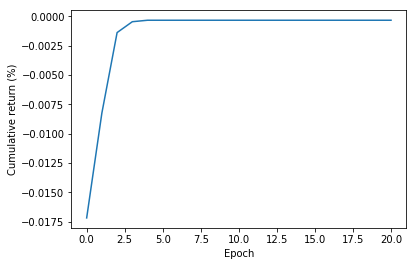

s = 1897 a = 1
s = 1798 a = 1
s = 1797 a = 1
s = 1799 a = 1
s = 1799 a = 1
s = 1799 a = 1
s = 1699 a = 1
s = 1699 a = 1
s = 1699 a = 1
s = 1689 a = 1
s = 1689 a = 1
s = 1689 a = 1
s = 1689 a = 1
s = 1689 a = 1
s = 1789 a = 1
s = 1889 a = 1
s = 1889 a = 1
s = 1889 a = 1
s = 1778 a = 1
s = 1446 a = 1
s = 1667 a = 1
s = 1768 a = 1
s = 1767 a = 1
s = 1767 a = 1
s = 1346 a = 1
s = 1335 a = 1
s = 1012 a = 0
s = 13 a = 2
s = 1001 a = 0
s = 1 a = 0
s = 0 a = 0
s = 101 a = 1
s = 454 a = 2
s = 1464 a = 1
s = 1574 a = 1
s = 1574 a = 1
s = 1574 a = 1
s = 1684 a = 1
s = 1684 a = 1
s = 1575 a = 0
s = 332 a = 0
s = 332 a = 0
s = 111 a = 0
s = 100 a = 0
s = 211 a = 0
s = 453 a = 2
s = 1323 a = 0
s = 212 a = 0
s = 214 a = 2
s = 1104 a = 0
s = 5 a = 2
s = 1113 a = 0
s = 211 a = 0
s = 221 a = 0
s = 452 a = 0
s = 341 a = 1
s = 452 a = 0
s = 331 a = 0
s = 0 a = 0
s = 221 a = 0
s = 0 a = 0
s = 321 a = 0
s = 565 a = 2
s = 1346 a = 1
s = 1776 a = 1
s = 1773 a = 0
s = 553 a = 2
s = 1886 a = 1
s = 1787 a = 1
s 

s = 1656 a = 1
s = 1866 a = 1
s = 1976 a = 1
s = 1977 a = 1
s = 1977 a = 1
s = 1988 a = 1
s = 1978 a = 1
s = 1877 a = 1
s = 1876 a = 1
s = 1877 a = 1
s = 1766 a = 1
s = 1766 a = 1
s = 1766 a = 1
s = 1666 a = 1
s = 1666 a = 1
s = 1667 a = 1
s = 1877 a = 1
s = 1657 a = 1
s = 1657 a = 1
s = 1446 a = 1
s = 1546 a = 1
s = 1967 a = 1
s = 1646 a = 1
s = 1755 a = 1
s = 1755 a = 1
s = 1854 a = 1
s = 1955 a = 1
s = 1966 a = 1
s = 1855 a = 1
s = 1955 a = 1
s = 1645 a = 1
s = 1444 a = 1
s = 1544 a = 1
s = 1434 a = 1
s = 1123 a = 1
s = 1544 a = 1
s = 1333 a = 1
s = 1434 a = 1
s = 1955 a = 1
s = 1845 a = 1
s = 1955 a = 1
s = 1954 a = 1
s = 1976 a = 1
s = 1976 a = 1
s = 1987 a = 1
s = 1987 a = 1
s = 1876 a = 1
s = 1665 a = 1
s = 1665 a = 1
s = 1776 a = 1
s = 1877 a = 1
s = 1888 a = 1
s = 1888 a = 1
s = 1888 a = 1
s = 1668 a = 1
s = 1888 a = 1
s = 1989 a = 1
s = 1778 a = 1
s = 1678 a = 1
s = 1778 a = 1
s = 1668 a = 1
s = 1668 a = 1
s = 1657 a = 1
s = 1557 a = 1
s = 1444 a = 1
s = 1666 a = 1
s = 1877 a

In [21]:
# Train and test a StrategyLearner
# Set verbose to True will print out and plot the cumulative return for each training epoch
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True,
                      num_states=3000, num_actions=3)
stl.add_evidence(symbol=symbol, start_val=start_val, 
                 start_date=start_date, end_date=end_date)
df_trades = stl.test_policy(symbol=symbol, start_date=start_date,
                            end_date=end_date)
print (df_trades)

Retrieve performance stats via a market simulator

Performances during training period for ESFULL
Date Range: 2014-10-06 00:00:00 to 2018-04-03 00:00:00
Sharpe Ratio of Portfolio: -0.002740331920818047
Sharpe Ratio of Benchmark : 0.6552139159905426

Cumulative Return of Portfolio: -0.0003374999999999906
Cumulative Return of Benchmark : 0.03286250000000002

Standard Deviation of Portfolio: 0.0007472802305485195
Standard Deviation of Benchmark : 0.000906287165091148

Average Daily Return of Portfolio: -1.28999014445314e-07
Average Daily Return of Benchmark : 3.740663757574919e-05

Final Portfolio Value: 99966.25
Final Benchmark Value: 103286.25


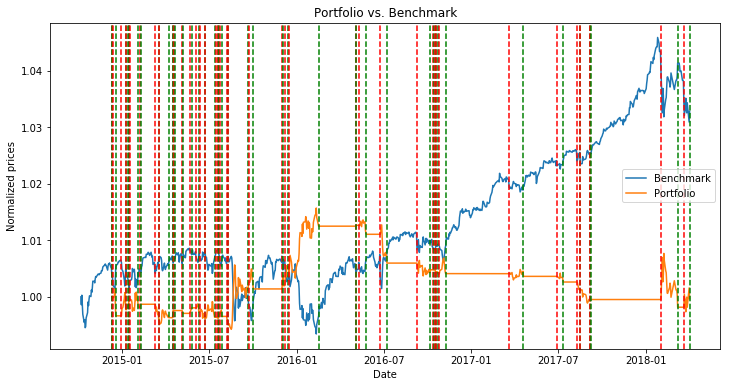

In [22]:
# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [23]:
start_val = 100000
symbol = "ESFULL"
commission = 0.00
impact = 0.0
num_shares = 5

In [24]:
start_date = dt.datetime(2014, 10, 6)
end_date = dt.datetime(2015, 4, 3)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [25]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2014-10-06       5
2015-04-02      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [26]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

s = 1997 a = 1
s = 1898 a = 1
s = 1997 a = 1
s = 1898 a = 1
s = 1799 a = 1
s = 1799 a = 1
s = 1799 a = 1
s = 1799 a = 1
s = 1699 a = 1
s = 1689 a = 1
s = 1689 a = 1
s = 1789 a = 1
s = 1779 a = 0
s = 779 a = 0
s = 888 a = 1
s = 989 a = 2
s = 1978 a = 1
s = 1978 a = 1
s = 1867 a = 1
s = 1546 a = 1
s = 1756 a = 0
s = 967 a = 0
s = 856 a = 0
s = 866 a = 2
s = 1445 a = 1
s = 1435 a = 1
s = 1013 a = 0
s = 13 a = 2
s = 1001 a = 0
s = 0 a = 0
s = 0 a = 0
s = 101 a = 1
s = 454 a = 2
s = 1554 a = 1
s = 1564 a = 1
s = 1664 a = 0
s = 664 a = 0
s = 674 a = 0
s = 675 a = 0
s = 565 a = 2
s = 1333 a = 1
s = 1332 a = 0
s = 110 a = 0
s = 100 a = 0
s = 221 a = 0
s = 453 a = 2
s = 1334 a = 1
s = 1223 a = 1
s = 1215 a = 1
s = 1105 a = 0
s = 5 a = 2
s = 1114 a = 1
s = 1211 a = 0
s = 321 a = 0
s = 552 a = 0
s = 441 a = 0
s = 552 a = 0
s = 330 a = 0
s = 0 a = 0
s = 330 a = 0
s = 10 a = 0
s = 332 a = 0
s = 655 a = 1
s = 446 a = 2
s = 1866 a = 1
s = 1763 a = 0
s = 554 a = 1
s = 976 a = 2
s = 1976 a = 1
s = 1987

Retrieve performance stats via a market simulator


Performances during testing period for ESFULL
Date Range: 2014-10-06 00:00:00 to 2015-04-03 00:00:00
Sharpe Ratio of Portfolio: -1.4323836240025132
Sharpe Ratio of Benchmark : 0.7372577965466658

Cumulative Return of Portfolio: -0.006262499999999949
Cumulative Return of Benchmark : 0.00517499999999993

Standard Deviation of Portfolio: 0.0007618782377788618
Standard Deviation of Benchmark : 0.000912485734109732

Average Daily Return of Portfolio: -6.874555863171302e-05
Average Daily Return of Benchmark : 4.237846157955245e-05

Final Portfolio Value: 99373.75
Final Benchmark Value: 100517.5


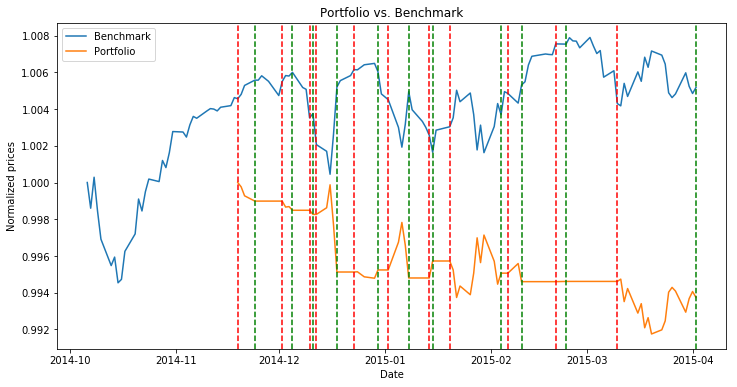

In [27]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 3) Out-of-sample performance <a class="anchor" id="third"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period
J7H2009
start_date = dt.datetime(2008, 3, 18)
end_date = dt.datetime(2009, 3, 16)

In [12]:
start_val = 100000
symbol = "SINE_FAST"
commission = 0.00
impact = 0.0
num_shares = 5

In [13]:
start_date = dt.datetime(2008, 12, 19)
end_date = dt.datetime(2010, 3, 19)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [14]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-12-19       5
2010-03-19      -5


Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [15]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

s = 1789 a = 1
s = 1778 a = 1
s = 1678 a = 1
s = 1678 a = 1
s = 1667 a = 1
s = 1667 a = 1
s = 1667 a = 1
s = 1566 a = 1
s = 1556 a = 1
s = 1556 a = 1
s = 1456 a = 1
s = 1445 a = 1
s = 1145 a = 0
s = 45 a = 0
s = 34 a = 0
s = 34 a = 0
s = 34 a = 0
s = 23 a = 1
s = 23 a = 1
s = 123 a = 2
s = 1112 a = 0
s = 112 a = 0
s = 112 a = 0
s = 101 a = 0
s = 201 a = 0
s = 201 a = 0
s = 200 a = 0
s = 200 a = 0
s = 200 a = 0
s = 210 a = 0
s = 310 a = 0
s = 310 a = 0
s = 321 a = 0
s = 321 a = 0
s = 321 a = 0
s = 432 a = 0
s = 432 a = 0
s = 442 a = 0
s = 443 a = 0
s = 443 a = 0
s = 553 a = 2
s = 1554 a = 0
s = 654 a = 2
s = 1764 a = 1
s = 1965 a = 1
s = 1965 a = 1
s = 1975 a = 1
s = 1976 a = 1
s = 1976 a = 1
s = 1986 a = 1
s = 1987 a = 1
s = 1987 a = 1
s = 1897 a = 1
s = 1898 a = 1
s = 1898 a = 1
s = 1898 a = 1
s = 1899 a = 1
s = 1899 a = 1
s = 1899 a = 1
s = 1799 a = 1
s = 1789 a = 1
s = 1789 a = 1
s = 1789 a = 1
s = 1789 a = 1
s = 1778 a = 1
s = 1678 a = 1
s = 1678 a = 1
s = 1667 a = 1
s = 1667 a = 1

Retrieve performance stats via a market simulator


Performances during testing period for SINE_FAST
Date Range: 2008-12-19 00:00:00 to 2010-03-19 00:00:00
Sharpe Ratio of Portfolio: 7.8937810446371675
Sharpe Ratio of Benchmark : -0.10736408855068925

Cumulative Return of Portfolio: 0.0031303354110145953
Cumulative Return of Benchmark : -7.486880478002611e-05

Standard Deviation of Portfolio: 2.252865382576942e-05
Standard Deviation of Benchmark : 3.538935292794798e-05

Average Daily Return of Portfolio: 1.1202631415591737e-05
Average Daily Return of Benchmark : -2.393488764179521e-07

Final Portfolio Value: 100313.03354110147
Final Benchmark Value: 99992.513119522


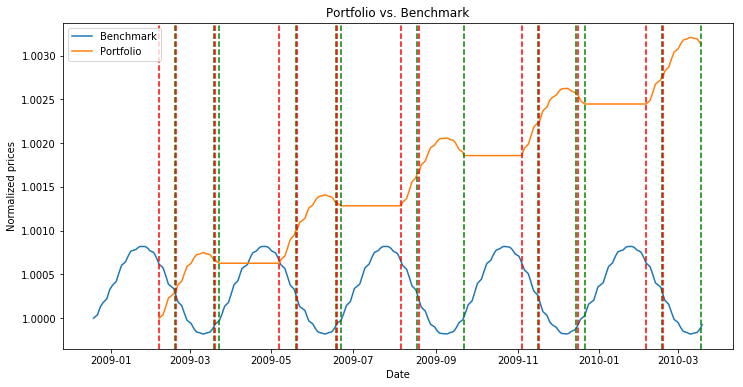

In [16]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)